<a href="https://colab.research.google.com/github/GauravSahani1417/Auto_NLP-Using-AutoViml/blob/main/Auto_NLP_Using_AutoViml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autoviml

     |████████████████████████████████| 122kB 3.5MB/s 
     |████████████████████████████████| 296kB 10.7MB/s 
     |████████████████████████████████| 133kB 11.1MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 6.8MB 9.5MB/s 
     |████████████████████████████████| 66.2MB 39kB/s 
     |████████████████████████████████| 148.9MB 76kB/s 
     |████████████████████████████████| 174kB 36.6MB/s 
     |████████████████████████████████| 665kB 32.1MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=8d706ab73cdfcd5e7899f4d774c2aa027918f28be4c8d80613ca6e9d3a2e1551
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=6a11eac552b753453e3ff91d681ee4ab689fadb3acb

In [2]:
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [3]:
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00', with_info=True, batch_size=-1)
train_dataset = dataset['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0.incompleteJ7ZHOI/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0. Subsequent calls will reuse this data.


In [4]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [5]:
dataset = tfds.as_numpy(train_dataset)

In [6]:
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [7]:
helpful_votes = dataset['data']['helpful_votes']
review_headline = dataset['data']['review_headline']
review_body = dataset['data']['review_body']
rating = dataset['data']['star_rating']

In [8]:
reviews_df = pd.DataFrame(np.hstack((helpful_votes[:, None], review_headline[:, None], review_body[:, None], rating[:, None])), columns=['votes','headline','reviews','rating'])
reviews_df.head(5)

,votes,headline,reviews,rating
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4
3,0,b'Five Stars',b'Top quality.',5
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3


In [9]:
convert_dict = {'votes': int,
                'headline': str,
                'reviews': str,
                'rating': int}

In [10]:
reviews_df = reviews_df.astype(convert_dict)
reviews_df

,votes,headline,reviews,rating
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4
3,0,b'Five Stars',b'Top quality.',5
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3
...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the...",5
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2


In [11]:
reviews_df['target'] = reviews_df["rating"].apply(lambda x: 1 if x>=4 else 0)
reviews_df

,votes,headline,reviews,rating,target
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4,1
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5,1
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4,1
3,0,b'Five Stars',b'Top quality.',5,1
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3,0
...,...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the...",5,1
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5,1
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3,0
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2,0


In [12]:
reviews_df.shape

(85981, 5)

In [13]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85981 entries, 0 to 85980
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   votes     85981 non-null  int64 
 1   headline  85981 non-null  object
 2   reviews   85981 non-null  object
 3   rating    85981 non-null  int64 
 4   target    85981 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.3+ MB


In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews_df, test_size=0.24)

In [15]:
from autoviml.Auto_NLP import Auto_NLP

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt


Imported Auto_NLP version: 0.0.44.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


Auto NLP processing on NLP Column: reviews
Shape of Train Data: 65345 rows
    Shape of Test Data: 20636 rows


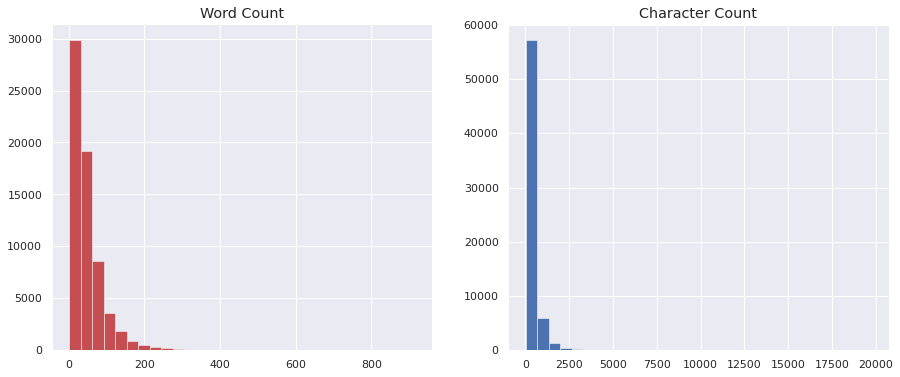

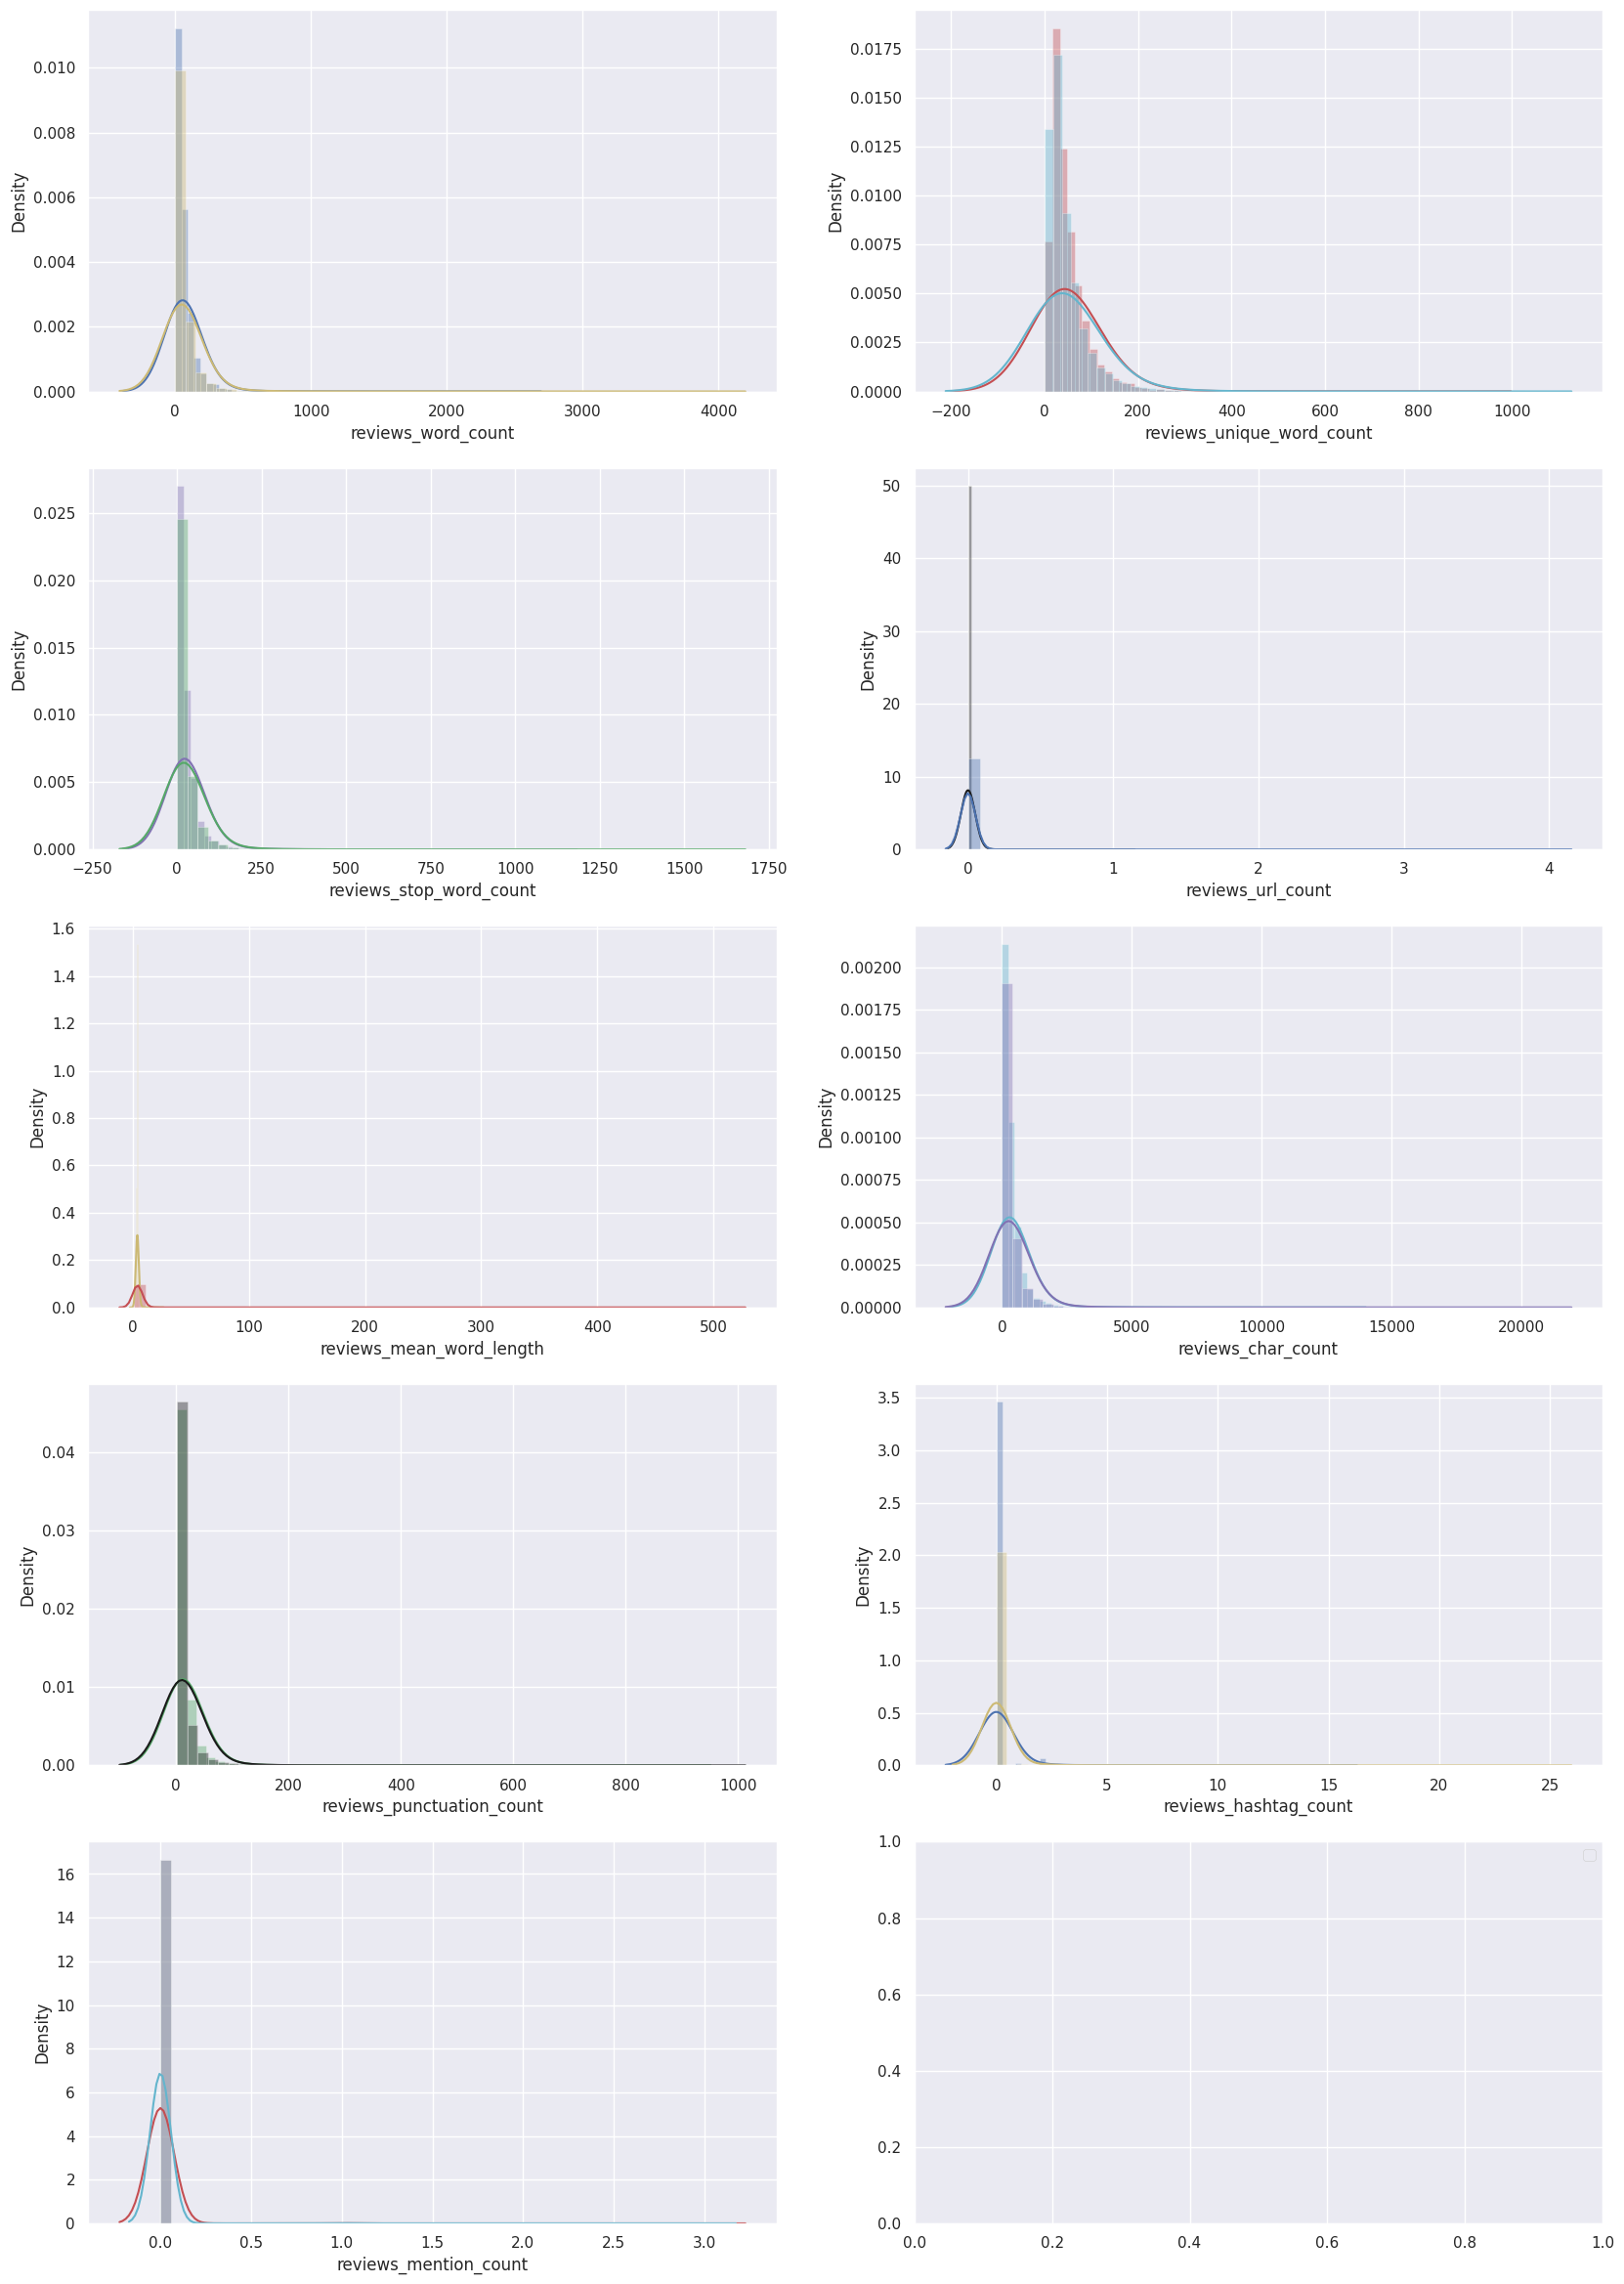

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for reviews column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 74 seconds
        Time Taken for Processing text in data = 302 seconds
Train data Text cleaning completed. Time taken = 401 seconds

For target = target

    For class = 0
Top 200 n-grams
: ['do', 'but', 'work', 'use', 'product', 'good', 'would', 'buy', 'they', 'like', 'will', 'if', 'time', 'me', 'after', 'when', 'make', 'well', 'what', 'no', 'your', 'money', 'go', 'back', 'try', 'these', 'off', 'think', 'great', 'take', 'them', 'much', 'item', 'even', 'really', 'need', 'because', 'give', 'look', 'return', 'price', 'purchase', 'come', 'could', 'first', 'there', 'thing', 'want', 'small', 'waste', 'also', 'order', 'which', 'find', 'day', 'ok', 'week', 'as', 'two', 'break', 'way', 'expect', 'recommend', 'feel', 'litt

In [ ]:
nlp_column = 'reviews'
target = 'target'
train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(
    nlp_column, train, test, target, score_type = 'balanced_accuracy',
    modeltype = 'classification', top_num_features = 100, verbose = 2, build_model = True
)

In [ ]:
nlp_transformer

In [ ]:
nlp_transformer.predict(test[nlp_column])